MHH [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.79610442e+02
 2.08338353e+02 2.35332329e+02 2.43444779e+02 1.89492972e+02
 8.81355422e+01 3.67510040e+01 1.55592369e+01 7.92670683e+00
 2.12851406e+00 3.99598394e-01 2.04819277e-01 1.05421687e-01
 3.91566265e-02 1.02409639e-01 3.01204819e-03 0.00000000e+00]


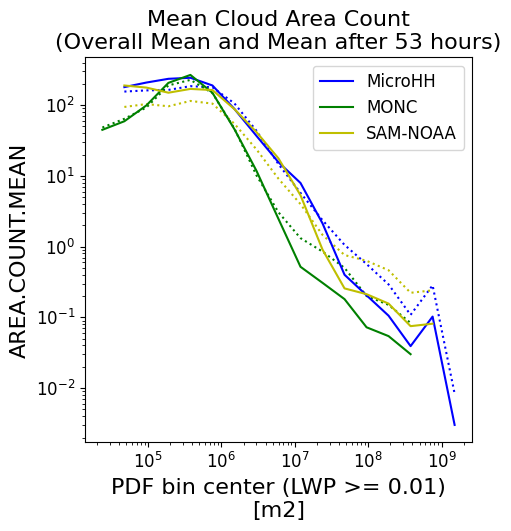

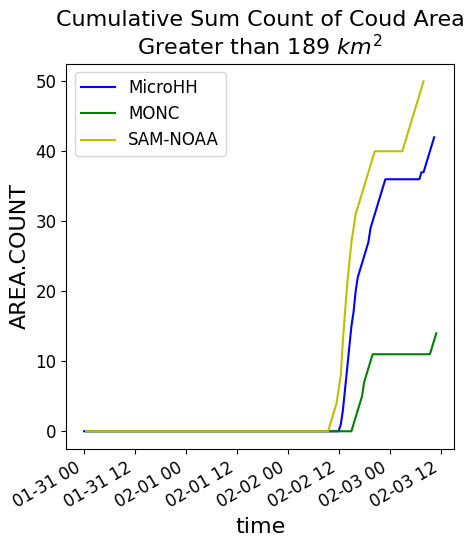

In [9]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_Feb2_512_200m_12kmtop_nudged6hr_jan31st_2d.LWP.LWP_>=_0.01.connected_regions.pdf_mod.nc',decode_times=True)
MONC=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_cloud_pdfs/d20200202_diagnostic_2d.LWP.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=True)
SAM_NOAA=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_cloud_pdfs/NOAA_SAM_EUREC4A_2020-02-02_512sqx153_200m_FY2M_RRTM_NA853.000_eurec4a_20200202.kpt_2D_1800s.LWP.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=True)

figure=pl.figure(figsize=(5,5))
MHH['AREA.COUNT.SECTIONMEAN']=MHH['AREA.COUNT'].isel(time=slice(53*12,None)).mean(dim=['time'])
MONC['AREA.COUNT.SECTIONMEAN']=MONC['AREA.COUNT'].isel(time=slice(53*2,None)).mean(dim=['time'])
SAM_NOAA['AREA.COUNT.SECTIONMEAN']=SAM_NOAA['AREA.COUNT'].isel(time=slice(53*2,None)).mean(dim=['time'])
MHH['AREA.COUNT.SECTIONMEAN'].where(MHH['AREA.COUNT.SECTIONMEAN']>0).plot.line('b:')
MONC['AREA.COUNT.SECTIONMEAN'].where(MONC['AREA.COUNT.SECTIONMEAN']>0).plot.line('g:')
SAM_NOAA['AREA.COUNT.SECTIONMEAN'].where(SAM_NOAA['AREA.COUNT.SECTIONMEAN']>0).plot.line('y:')

MHH['AREA.COUNT.MEAN']=MHH['AREA.COUNT'].mean(dim=['time'])
MONC['AREA.COUNT.MEAN']=MONC['AREA.COUNT'].mean(dim=['time'])
SAM_NOAA['AREA.COUNT.MEAN']=SAM_NOAA['AREA.COUNT'].mean(dim=['time'])
MHH['AREA.COUNT.MEAN'].where(MHH['AREA.COUNT.MEAN']>0).plot.line('b-',label='MicroHH')
MONC['AREA.COUNT.MEAN'].where(MONC['AREA.COUNT.MEAN']>0).plot.line('g-',label='MONC')
SAM_NOAA['AREA.COUNT.MEAN'].where(SAM_NOAA['AREA.COUNT.MEAN']>0).plot.line('y-',label='SAM-NOAA')
pl.xscale('log')
pl.legend()
pl.yscale('log')
pl.title(r"Mean Cloud Area Count" +"\n"+ "(Overall Mean and Mean after 53 hours)")

cut_off=15
figure=pl.figure(figsize=(5,5))
MHH['AREA.COUNT'].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).isel(time=slice(None,None,6)).cumsum().plot.line('b-',label='MicroHH')
MONC['AREA.COUNT'].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).cumsum().plot.line('g-',label='MONC')
SAM_NOAA['AREA.COUNT'].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).cumsum().plot.line('y-',label='SAM-NOAA')
pl.legend()
pl.title(f'Cumulative Sum Count of Coud Area'+"\n"+ f'Greater than {int(MHH["AREA"].isel(AREA=cut_off).values/1e6)} $km^2$')
print('MHH',MHH['AREA.COUNT'].mean(dim=['time']).values)

